In [2]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=2545d9e7d53aad23fe604f57fba016e292fa141c04e935683c50446b74aa1dd7
  Stored in directory: c:\users\korol\appdata\local\pip\cache\wheels\09\a1\04\08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python-speech-features


In [25]:
!pip install noisereduce

In [27]:
!pip install malaya_speech

  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=44702 sha256=facb0b6e5064f6e4c3853d201d0381033a37ffb23fb67f16375b5a5598e514fc
  Stored in directory: c:\users\korol\appdata\local\pip\cache\wheels\a7\cb\f2\25802a0599b033b24cbf2cb0210af6f13c27291db92cd5178c
Successfully built memoization


In [30]:
!pip install torch

In [40]:
!pip install webrtcvad

  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp39-cp39-win_amd64.whl size=18751 sha256=6a8b87e1144c39cee9e2829331bb3aaccc2b7d5fff167797d35ac9570b32732c
  Stored in directory: c:\users\korol\appdata\local\pip\cache\wheels\1f\fe\28\e8f0d5847ae2642b49fa974db1cea44d59ab59d0251c12f17b
Successfully built webrtcvad


In [31]:
import numpy as np 
import pandas as pd
import shutil
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import noisereduce as nr
from scipy.io import wavfile
import tensorflow 
import os
import malaya_speech
from malaya_speech import Pipeline


from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

In [32]:
from scipy import signal
import librosa.display

In [33]:
train_path = 'commands'
test_file = '/left/00b01445_nohash_0.wav'

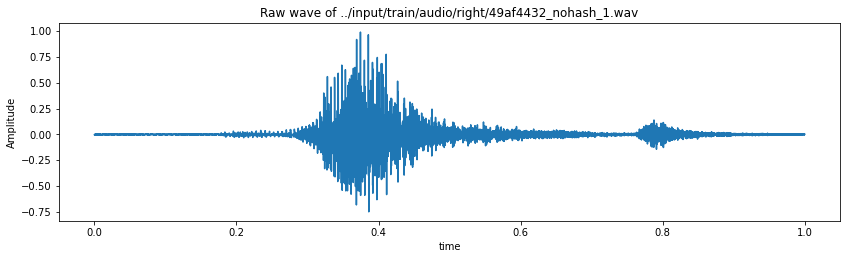

In [34]:
samples, sample_rate = librosa.load(train_path + test_file, sr=16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/right/49af4432_nohash_1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
fig.show()

In [35]:
ipd.Audio(samples, rate=sample_rate)

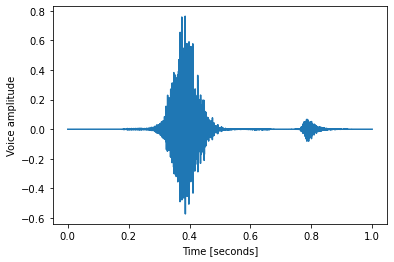

In [37]:
time = np.linspace(0, len(samples - 1) / sample_rate, len(samples - 1))
reduced_noise1 = nr.reduce_noise(y=samples, sr=sample_rate,stationary=True)
plt.plot(time, reduced_noise1)  # plot in seconds
plt.xlabel("Time [seconds]")
plt.ylabel("Voice amplitude")
plt.show()

In [38]:
ipd.Audio(reduced_noise1, rate=sample_rate)

In [41]:
#Silence Removal
vad = malaya_speech.vad.webrtc()
y=reduced_noise1
y_= malaya_speech.resample(y, sample_rate, 16000)
y_ = malaya_speech.astype.float_to_int(y_)
frames = malaya_speech.generator.frames(y, 30, sample_rate)
frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
y_ = malaya_speech.combine.without_silent(frames_webrtc)
y_

array([-7.5932556e-05, -7.8418576e-05, -8.0812119e-05, ...,
       -1.4452168e-07,  1.7505888e-09,  1.4744687e-07], dtype=float32)

In [43]:
ipd.Audio(y_, rate = sample_rate)

In [45]:
zero = np.zeros((1*sample_rate-y_.shape[0]))
signal = np.concatenate((y_,zero))
signal.shape
time = np.linspace(0, len(signal - 1) / sample_rate, len(signal - 1))

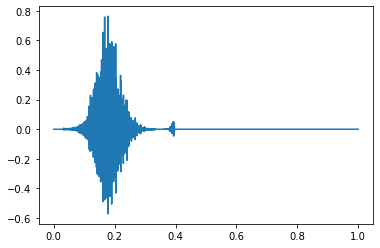

In [46]:
plt.plot(time,signal)

In [48]:
labels = os.listdir(train_path)
labels

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

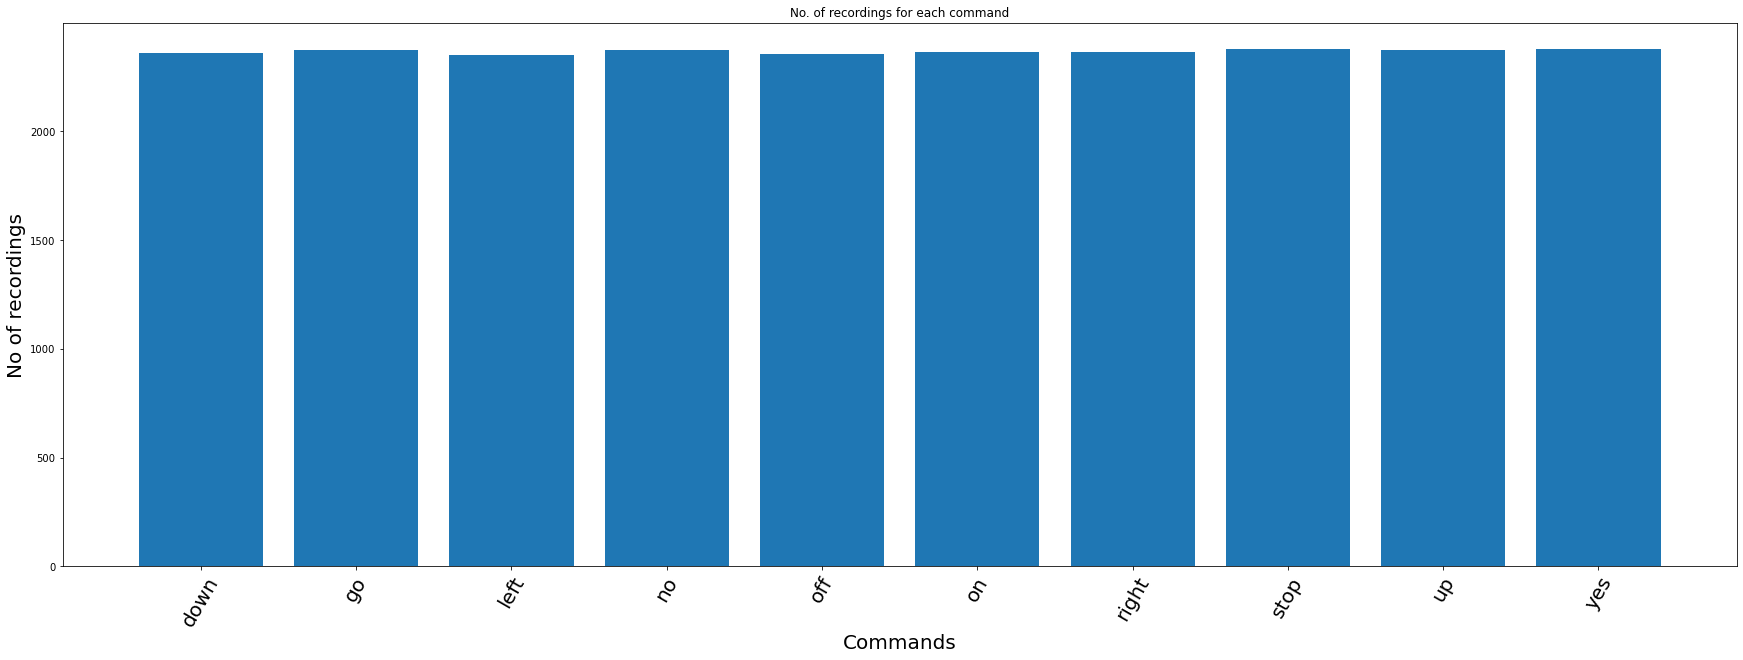

In [50]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,10))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=20)
plt.ylabel('No of recordings', fontsize=20)
plt.xticks(index, labels, fontsize=20, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [54]:
sr=16000
vad = malaya_speech.vad.webrtc()
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_path + '/' + label + '/' + wav, sr = 16000)
        samples = nr.reduce_noise(y=samples, sr=sr,stationary=True)
        y_= malaya_speech.resample(samples, sr, 16000)
        y_ = malaya_speech.astype.float_to_int(y_)
        frames = malaya_speech.generator.frames(samples, 30, sr)
        frames_ = list(malaya_speech.generator.frames(y_, 30, 16000, append_ending_trail = False))
        frames_webrtc = [(frames[no], vad(frame)) for no, frame in enumerate(frames_)]
        y_ = malaya_speech.combine.without_silent(frames_webrtc)
        zero = np.zeros(((1*sample_rate+4000)-y_.shape[0]))
        signal = np.concatenate((y_,zero))
        all_wave.append(signal)
        all_label.append(label)

down
go
left
no
off
on
right
stop
up
yes


(23682, 20000)
(23682,)
down


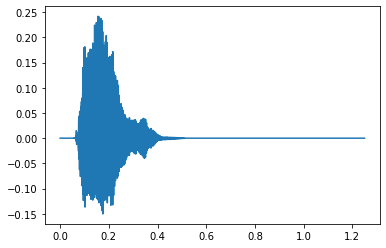

In [56]:
print(np.array(all_wave).shape)
print(np.array(all_label).shape)
time = np.linspace(0, len(signal - 1) / sample_rate, len(signal - 1))
plt.plot(time,np.array(all_wave)[2000,:])
print(np.array(all_label)[2000])
ipd.Audio(np.array(all_wave)[2000,:], rate = sr )

In [58]:
all_mfcc=[]
for wave in all_wave:
    i=0
    mfcc_feat = mfcc(wave , sample_rate, winlen=256/sample_rate, winstep=256/(2*sample_rate), numcep=13, nfilt=26, nfft=256,
                 lowfreq=0, highfreq=sample_rate/2, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=np.hamming)
    mfcc_feat= np.transpose(mfcc_feat)
    all_mfcc.append(mfcc_feat)

In [59]:
print(np.array(all_mfcc).shape)
print(np.array(all_label).shape)
d1=np.array(all_mfcc).shape[1]
d2=np.array(all_mfcc).shape[2]
d=d1*d2
print(d)

(23682, 13, 156)
(23682,)
2028


In [61]:
op_mfcc=np.array(all_mfcc)
op_mfcc=op_mfcc.reshape(23682, -1)
op_mfcc.shape

(23682, 2028)

In [62]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [63]:
from keras.optimizers import SGD
from keras.constraints import maxnorm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
y=tensorflow.keras.utils.to_categorical(y, num_classes=len(labels), dtype='float32')
y.shape

(23682, 10)

In [65]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val= train_test_split(op_mfcc,np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [66]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)

(18945, 2028)
(18945, 10)
(4737, 2028)
(4737, 10)


In [93]:
#Model Architecture
model = Sequential()
model.add(Dense(600, activation='sigmoid', input_shape=(d,), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax' , kernel_constraint=maxnorm(3)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 600)               1217400   
                                                                 
 dropout_5 (Dropout)         (None, 600)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                6010      
                                                                 
Total params: 1,223,410
Trainable params: 1,223,410
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [96]:
history=model.fit(x_tr, y_tr,validation_data=(x_val,y_val), epochs=100, batch_size=32)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
592/593 [============================>.] - ETA: 0s - loss: 0.8690 - accuracy: 0.7202WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025F33526310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity

593/593 [==============================] - 16s 26ms/step - loss: 0.4846 - accuracy: 0.8459 - val_loss: 0.4272 - val_accuracy: 0.8708
Epoch 44/100
593/593 [==============================] - 15s 26ms/step - loss: 0.4764 - accuracy: 0.8496 - val_loss: 0.4249 - val_accuracy: 0.8721
Epoch 45/100
593/593 [==============================] - 17s 29ms/step - loss: 0.4789 - accuracy: 0.8477 - val_loss: 0.4153 - val_accuracy: 0.8792
Epoch 46/100
593/593 [==============================] - 16s 28ms/step - loss: 0.4749 - accuracy: 0.8476 - val_loss: 0.4209 - val_accuracy: 0.8725
Epoch 47/100
593/593 [==============================] - 18s 31ms/step - loss: 0.4753 - accuracy: 0.8494 - val_loss: 0.4171 - val_accuracy: 0.8725
Epoch 48/100
593/593 [==============================] - 16s 28ms/step - loss: 0.4648 - accuracy: 0.8523 - val_loss: 0.4133 - val_accuracy: 0.8769
Epoch 49/100
593/593 [==============================] - 18s 30ms/step - loss: 0.4626 - accuracy: 0.8544 - val_loss: 0.4237 - val_accuracy

593/593 [==============================] - 17s 29ms/step - loss: 0.4696 - accuracy: 0.8486 - val_loss: 0.4257 - val_accuracy: 0.8691
Epoch 100/100
593/593 [==============================] - 17s 28ms/step - loss: 0.4667 - accuracy: 0.8482 - val_loss: 0.4153 - val_accuracy: 0.8765


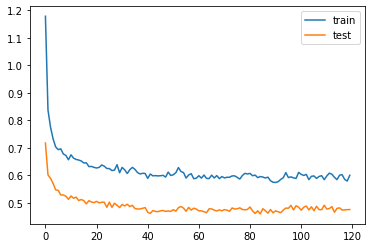

In [80]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

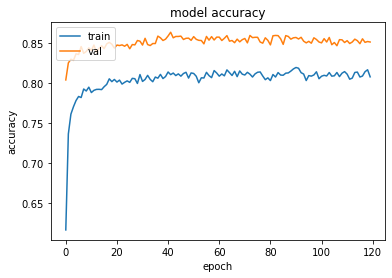

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [83]:
y_predict=model.predict(x_val)
conf_mat=tensorflow.math.confusion_matrix(np.argmax(y_val,axis=1) , np.argmax(y_predict,axis=1))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: tensorflow_probability is not installed. Please install it and try again.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
149/149 [==============================] - 1s 3ms/step


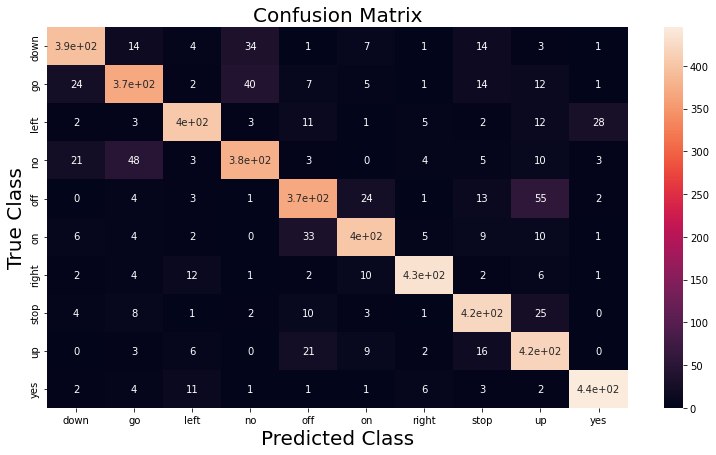

In [84]:
df_cm = pd.DataFrame(np.array(conf_mat), index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (13,7))
ax = sn.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel("True Class"     , fontsize=20)
plt.xlabel("Predicted Class", fontsize=20)
plt.show()